In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import jieba

#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'


In [2]:
filepath = 'lihuanying.csv'
# 添加行标题
data = pd.read_csv(filepath,header=None,names=['用户ID','评分星级','点赞数','发布日期','评论内容'])

In [4]:
 
# 查看数据整体信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户ID    988 non-null    object
 1   评分星级    988 non-null    int64 
 2   点赞数     988 non-null    int64 
 3   发布日期    988 non-null    object
 4   评论内容    988 non-null    object
dtypes: int64(2), object(3)
memory usage: 38.7+ KB
None


In [5]:
# 查看数据前5个
data

,用户ID,评分星级,点赞数,发布日期,评论内容
0,pi1905,4,32761,['2021-02-12'],你以为你已经很爱很爱妈妈了，但妈妈远比你想象中更爱更爱更爱你。
1,vc,4,14591,['2021-02-12'],有笑有泪的，不明白陈赫这个人物有什么作用，完全多余
2,豌豆仁儿,4,10170,['2021-02-12'],能理解贾玲执意拍这部电影，在惹妈妈生气了十几年终于有能力回报妈妈的时候，妈妈离自己而去，这种...
3,盲忙,4,6535,['2021-02-12'],笑后有泪，温暖感动却不过分煽情，它正是这个春节最需要的电影。期待贾玲和沈腾这两位喜剧界扛把子...
4,停止狡辩,4,6023,['2021-02-13'],跟唐人街探案三的分数相比，很明显观众们评判电影的标准不仅在于你拍的好坏，而更在于你拍的态度是否真诚
...,...,...,...,...,...
983,安仔大kuma,2,7,['2021-02-13'],游戏根据书改编的，电影却强调根据游戏改编的，我纯粹觉得挺好笑的，看和郭四那部谁更烂，没想到这...
984,皮卡丘～啾咪～,1,9,['2021-02-12'],全程好无聊，快睡着的水平，一星给周迅
985,葵花籽,2,3,['2021-02-13'],小式神搞的再可爱也拯救不了这片。完全没灵魂啊，干巴巴的。周迅看着也不灵了，化妆也很灾难..感...
986,黑色长尾夹,1,9,['2021-02-14'],百十来块钱一张票，白瞎了，除了桃花仙和蝴蝶仙，啥也没记住


array([[<AxesSubplot:title={'center':'评分星级'}>]], dtype=object)

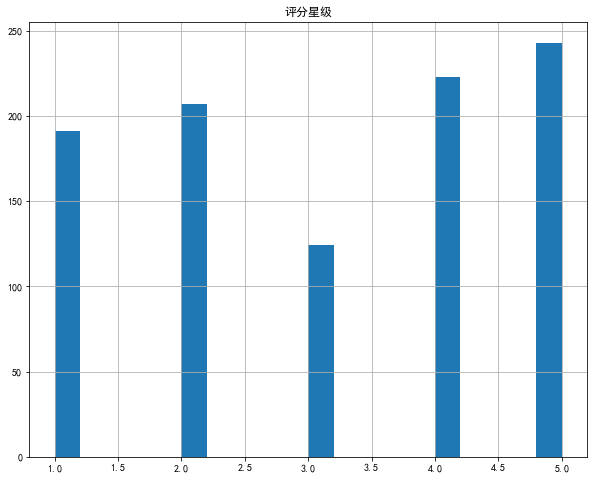

In [7]:
data.hist(u"评分星级",bins=20, figsize=(10,8))

In [10]:
# 将所有评论变为一个字符串
comments = ''
for k in range(len(data['评论内容'])):
    comments = comments +(str(data['评论内容'][k])).strip()
 
print(comments)

看下去的事陈伟霆，陈伟霆好帅好帅。陈坤一如既往的演技好，但是在这部电影里只是发挥正常，周迅脸僵的动不了了，有演技但是发挥不出来了。这不就是《捉妖记》+《千与千寻》嘛~ 虽然想象力、服化道、视觉特效都在线，但这类电影最火的时候不是五六年前嘛，早已对群魔乱舞的卖萌“动画片”审美疲劳，关键故事共情力也稍差火候，算看了个寂寞吧~电影真的非常注重细节，诚意满满，小鬼赤的皮肤就很像小孩子的皮肤比较饱满，大鬼赤的就很粗糙，连毛孔都能看清，真的从来没有在华语片里见到这么细致的数字角色，瑞思白了。这才是郭敬明拍的吧！画面精美，节奏失控，无论是妖域探险、竹林屠杀还是最终决战都平缓成一潭死水。固然《侍神令》比《晴雅集》塑造了更为丰富的妖域与妖怪，但花了如此心神的妖怪竟然只会如人类一般劈砍，而主要的剧情却被这些给打散，打淡。过多人物的设置分散了所剩无几的时间，使得没有一个人物丰富起来。如果说《晴雅集》抄袭《奇异博士》，那么《侍神令》真的是抄袭了《雷神3》和《奇异博士》，彩虹桥对传送阵，浩克大战斯芬克对赤鬼大战鱼头怪，彩虹桥对木桥，雷神对晴明，时间循环对反向咒语。哦对了，该片配音真是坨屎。所以已注萧才是主角吧🙃红发小魔女与白发小魔女之战。可以说是华语电影顶级制作了，音乐美术特效全部令人惊喜。阴阳师游戏的世界观被高度还原，纯数字角色也被赋予了“人味儿”。看得出《寻龙诀》过后，陈国富团队又精进了实力。高工业水平，正是幻想类电影的基石。加上再度合作的陈坤周迅全程飙戏，突出一个誓约羁绊，电影很难不好看。这个。。。太难看了太难看了太难看了，怎么可以这么难看陈坤演的晴明太帅了吧!!坤哥的颜值真的是从小吃到大🙊  

特效真的是太棒了 细节很到位 山蛙山兔鸦天狗雪女镰鼬桃花妖茨木  这部剧真的是值得一看双发髻、油纸伞！！！这太戳我的点了，这不就是最近很火的神明少女造型！沈月驾驭的还不错，果然，明星和网红之间还是有壁的拒绝屈楚萧“妖可以和主人同生共死，人能做到吗？”从游戏到大银幕，呈现的是古典文化与流行元素的混搭效果。整体情感非常克制，将主线放在冒险和视效呈现上，两界泾渭的展示、表里线索的呈现，依然是用妖来反衬人间，但这里选择了“羁绊”的角度进行了勾连，倒是让人想起了人与宠物之情，并以此抨击人类的尔虞我诈，这个角度还是很有噱头。当年刷过游戏，妖怪还是比较丰富，找妖怪成了最大的乐趣，妖域段落全片最佳，让人想起

In [5]:
# 使用正则表达式去标点和表情
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
 
print(cleaned_comments)

阳师是一款现象级手游在街边巷尾公交轮船上都曾见过玩家痴迷于这款游戏华丽的画面梦幻般的招式精致的人物都让阴阳师成为经久不衰的一款手游正因为原在国内游戏界各方面都处于经典与顶尖位置加之手游改编成电影的案例非常少我依然认为侍神令是一部超出预期高标准的游改影电影又不能回家过年了大年初一在电影院看侍神令山兔可爱建筑也很美安抚了我这颗不能回家而焦虑的心无论身处何地只要心有归处就不会觉得孤单也不再漂泊看完只想二刷晴雅集但光看陈坤还是值回票价特效还可以细节设定有眼前一亮的地方节奏紧凑起码故事是过得去的可终究还是逃不过电视剧质感各种摇移镜头堆砌看得我有些晕果然是利用陈坤和周迅来骗钱电影垃圾的不行沈月演技让人浑身尴尬无疑是这几年最好看的古装奇幻电影特效震撼庭院红楼拍的绮丽诡谲非常震撼陈国富张家鲁的金牌班底果然带来了惊喜同渡真好听电影画面很美又被陈坤帅到了我很久没看过这么喜欢的电影了晴明的侍神即便曾经被人类伤害过但仍然愿意在危急时刻替晴明守住东京城这种生死的信任与忠诚很值得人钦佩也看得出晴明与这些妖深深的羁绊感觉侍神这个设定就足以让我心动了与主人同生共死绝不背叛这种羁绊是人与人之间无法得到的承诺小晴明真的是美强惨本惨好心疼影片情节跌宕起伏主演演技很在线慈沐黑化很妖孽对于弃坑了的玩家来说整体来说做得蛮好的这电影是给玩家看的后期票房估计也只能靠玩家撑起来了期待有后续期待我大帚神也能撑起一片天陈坤饰演的晴明宇宙最美强惨没问题没意思没意义谁要看屈楚萧发中二病怎么能这么难看剧情之间接的这么硬整体奇门遁甲化前面还有些东方奇术结尾超人大战感觉也没多少经费大场景很少妖怪法术展示很少美术和服装稀烂星质量对不起演员阵容打戏出色非常徐克特效停留在五年前捉妖记的时代陈坤周迅这对没有爱情火花顶多是友情火花两人驻颜有术但要是以十年前的颜演这部效果会更好博雅好似智商欠费神乐永远睁大双眼哭唧唧关于人与妖关系的探讨其实不错人没人性妖却有情人想摧毁人界最后却靠妖来守护人界妖精大战全部肉搏太蠢了能来个法师么配音口型对不上啊陈坤的脸亦正亦邪演这种一半妖一半人血统的阴阳师晴明太适合了玩儿扇子的时候帅炸完成度有动作设计是短板侍神令的含义片中已经反复提到了结尾屈楚萧强行点题的独白就多余了王丽坤的造型真美阴阳师手游改编平安京的平行世界幸亏不是原平安京要不然袁柏雅演成这样我能骂死痒痒鼠我的重点在人和侍神的羁绊侍神的消亡让我想起我庭院里那

In [11]:
# 分词
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})
 
words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\quzhe\AppData\Local\Temp\jieba.cache
Loading model cost 0.847 seconds.
Prefix dict has been built successfully.


,segment
0,听说
1,过
2,这
3,片子
4,不如


In [12]:
# 去停用词
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
 
words_df.head(10)

,segment
0,听说
1,过
3,片子
4,不如
5,晴
6,雅集
7,看
8,之前
10,不信
11,看


In [13]:
# 词频统计
import numpy 
 
words_stat=words_df.groupby(by=['segment'])['segment'].agg([("计数",numpy.size)])
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
 
words_stat.head(10)

,segment,计数
4188,陈坤,205
3133,看,193
1156,周迅,177
3039,电影,150
141,不,128
2524,有,114
4216,雅集,112
2474,晴明,105
3181,真的,103
1451,好,102


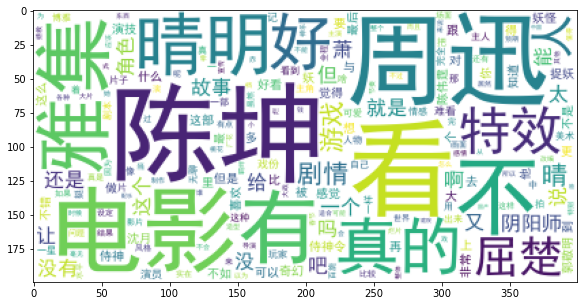

In [14]:
# 词云显示
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
from wordcloud import WordCloud,ImageColorGenerator # 词云包
 
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)
 
wordcloud=wordcloud.fit_words(word_frequence)
 
#image_colors = ImageColorGenerator(bg_pic) # 根据图片生成词云颜色
plt.imshow(wordcloud)
wordcloud.to_file('shishenling.png')  # 把词云保存下来